In [1]:
# 資料集路徑
DS_GlobalLandTemperaturesByMajorCity = './climate_change_earth_surface_temperature_data/GlobalLandTemperaturesByMajorCity.csv'

## 函式庫使用

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import folium
import imageio
from tqdm import tqdm_notebook
from folium.plugins import MarkerCluster

In [3]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
from geopy.geocoders import Nominatim

In [4]:
import imageio
import mapclassify as mc
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import scipy
from itertools import product
import seaborn as sns

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

In [6]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [7]:
data = pd.read_csv(DS_GlobalLandTemperaturesByMajorCity)

## 顯示資料集資料

In [8]:
# 除錯步驟
data.drop_duplicates(['City'])

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1977,1850-01-01,15.986,1.537,Addis Abeba,Ethiopia,8.84N,38.11E
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
6555,1791-05-01,20.836,1.993,Aleppo,Syria,36.17N,37.79E
9224,1791-05-01,20.772,1.848,Alexandria,Egypt,31.35N,30.16E
...,...,...,...,...,...,...,...
227665,1845-01-01,2.377,2.006,Tokyo,Japan,36.17N,139.23E
229690,1743-11-01,-0.106,1.905,Toronto,Canada,44.20N,80.50W
232929,1859-01-01,22.286,2.118,Umm Durman,Sudan,15.27N,32.50E
234786,1841-01-01,2.734,2.772,Wuhan,China,29.74N,114.46E


In [9]:
city_data = data.drop_duplicates(['City'])
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1977,1850-01-01,15.986,1.537,Addis Abeba,Ethiopia,8.84N,38.11E
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
6555,1791-05-01,20.836,1.993,Aleppo,Syria,36.17N,37.79E
9224,1791-05-01,20.772,1.848,Alexandria,Egypt,31.35N,30.16E


In [10]:
LAT = []
LONG = []
for city in city_data.City.tolist():
    locator = Nominatim(user_agent="myGeocoder")
    location = locator.geocode(city)
    LAT.append(location.latitude)
    LONG.append(location.longitude)

In [11]:
world_map= folium.Map()
geolocator = Nominatim(user_agent="Piero")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(city_data)):
        #lat = city_data.iloc[i]['Latitude']
        #long = city_data.iloc[i]['Longitude']
        lat = LAT[i]
        long = LONG[i]
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius,fill =True, color='darkred',fill_color='darkred').add_to(marker_cluster)

## 地圖顯示

In [12]:
world_map

([<matplotlib.patches.Wedge at 0x28534743d90>,
 [Text(-1.0950344628649946, 0.10440079088767877, 'Non NaN elements'),
  Text(1.3936802176892007, -0.132873815410646, 'NaN elements')])

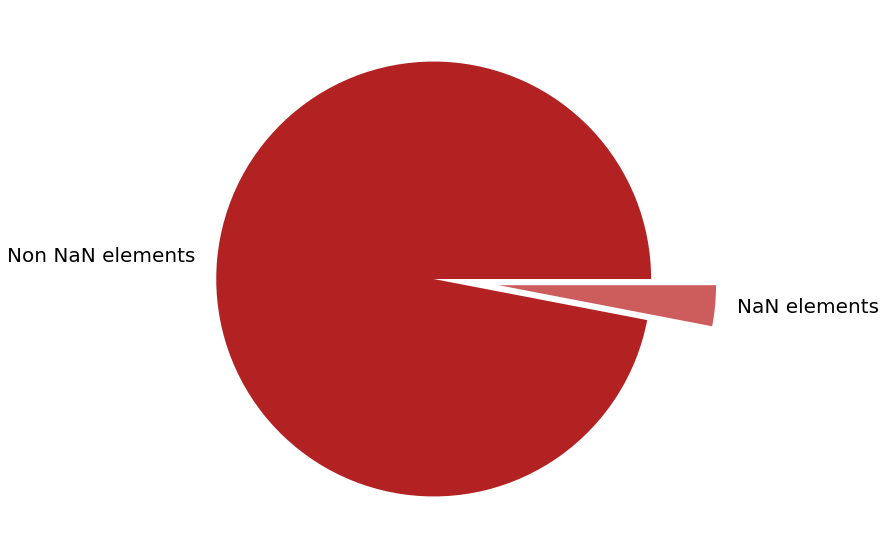

In [13]:
explodes = (0,0.3)
plt.pie(data[data['City']=='Chicago'].AverageTemperature.isna().value_counts(),explode=explodes,startangle=0,colors=['firebrick','indianred'],
   labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 20})

In [14]:
chicago_data = data[data['City']=='Chicago']

In [15]:
chicago_data['AverageTemperature']=chicago_data.AverageTemperature.fillna(method='bfill')

<ipython-input-15-84f2fdaf2630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_data['AverageTemperature']=chicago_data.AverageTemperature.fillna(method='bfill')


In [16]:
chicago_data['AverageTemperatureUncertainty']=chicago_data.AverageTemperatureUncertainty.fillna(method='bfill')

<ipython-input-16-78f8cd0627c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_data['AverageTemperatureUncertainty']=chicago_data.AverageTemperatureUncertainty.fillna(method='bfill')


In [17]:
chicago_data = chicago_data.reset_index()

In [18]:
chicago_data = chicago_data.drop(columns=['index'])

In [19]:
chicago_data.dt = pd.to_datetime(chicago_data.dt)

In [20]:
YEAR = []
MONTH = []
DAY = []
WEEKDAY = []
for i in range(len(chicago_data)):
    WEEKDAY.append(chicago_data.dt[i].weekday())
    DAY.append(chicago_data.dt[i].day)
    MONTH.append(chicago_data.dt[i].month)
    YEAR.append(chicago_data.dt[i].year)

In [21]:
chicago_data['Year'] = YEAR
chicago_data['Month'] = MONTH
chicago_data['Day'] = DAY 
chicago_data['Weekday'] = WEEKDAY

In [22]:
change_year_index = []
change_year = []
year_list = chicago_data['Year'].tolist()
for y in range(0,len(year_list)-1):
    if year_list[y]!=year_list[y+1]:
        change_year.append(year_list[y+1])
        change_year_index.append(y+1)

In [23]:
chicago_data.loc[change_year_index].head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Day,Weekday
2,1744-01-01,8.766,2.357,Chicago,United States,42.59N,87.27W,1744,1,1,2
14,1745-01-01,-0.901,2.649,Chicago,United States,42.59N,87.27W,1745,1,1,4
26,1746-01-01,-0.966,2.577,Chicago,United States,42.59N,87.27W,1746,1,1,5
38,1747-01-01,-0.966,2.577,Chicago,United States,42.59N,87.27W,1747,1,1,6
50,1748-01-01,-0.966,2.577,Chicago,United States,42.59N,87.27W,1748,1,1,0


In [24]:
x_ticks_year_list=np.linspace(min(year_list),max(year_list),10).astype(int)
change_year_index = np.array(change_year_index)
x_ticks_year_index = []
for i in range(1,len(x_ticks_year_list)):
    x_ticks_year_index.append(change_year_index[np.where(np.array(change_year)==x_ticks_year_list[i])][0])

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (10).

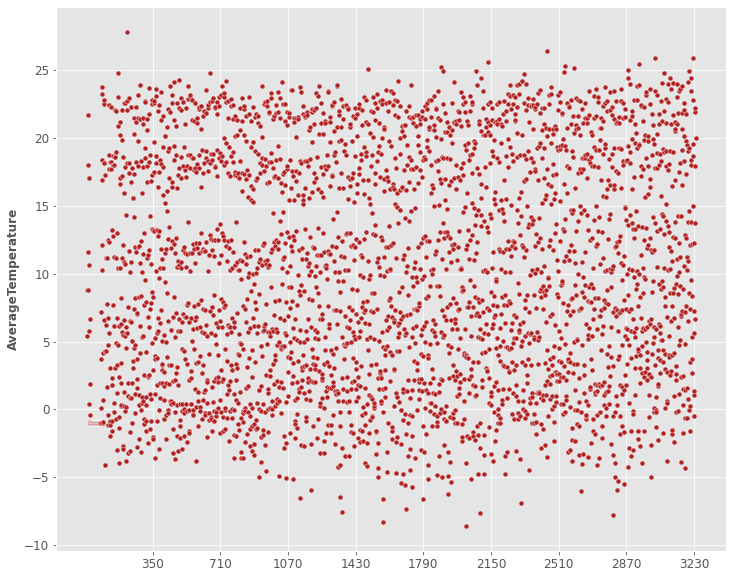

In [25]:
sns.scatterplot(x=chicago_data.index,y=chicago_data.AverageTemperature,s=25,color='firebrick')
plt.xticks(x_ticks_year_index,x_ticks_year_list)
plt.title('Temperature vs Year Scatter plot',color='firebrick',fontsize=40)
plt.xlabel('Year')
plt.ylabel('Average Temperature')

NameError: name 'plot_timeseries' is not defined

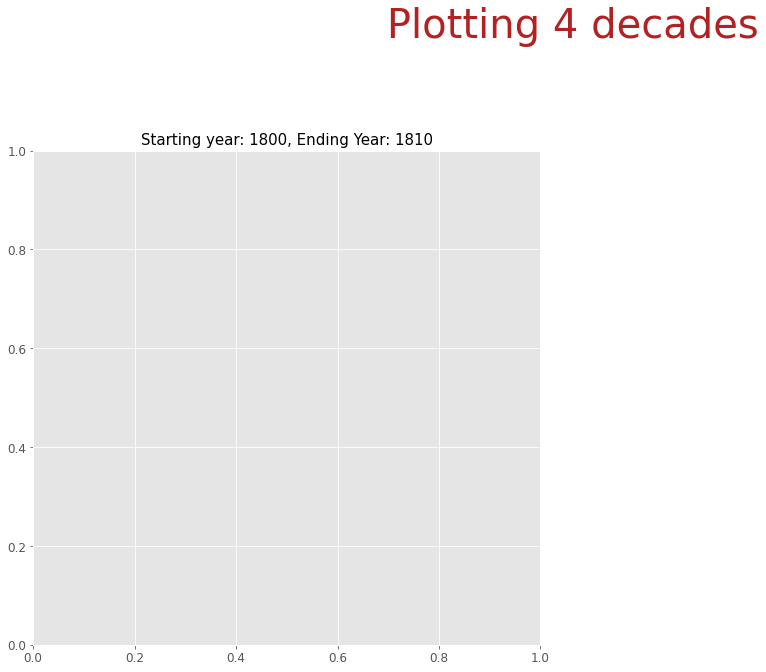

In [26]:
plt.figure(figsize=(20,20))
plt.suptitle('Plotting 4 decades',fontsize=40,color='firebrick')

plt.subplot(2,2,1)
plt.title('Starting year: 1800, Ending Year: 1810',fontsize=15)
plot_timeseries(1800,1810)
plt.subplot(2,2,2)
plt.title('Starting year: 1900, Ending Year: 1910',fontsize=15)
plot_timeseries(1900,1910)
plt.subplot(2,2,3)
plt.title('Starting year: 1950, Ending Year: 1960',fontsize=15)
plot_timeseries(1900,1910)
plt.subplot(2,2,4)
plt.title('Starting year: 2000, Ending Year: 2010',fontsize=15)
plot_timeseries(1900,1910)
plt.tight_layout()